# MTH9855 Homework 7 
# Likun Ouyang

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## The attached data set contains, for a selection of European countries, monthly total returns (with dividends reinvested) of cap-weighted indices, and the previous month’s ending market cap in USD. Load the data set from the csv file and give it a name as all_data

In [2]:
all_data = pd.read_csv("monthlyRets-clean.csv",index_col='DATE')

In [3]:
all_data.iloc[0,1::2]=0

## First plot the cumulative log total return for each country on the same graph. The plot should already make it clear that these return series are highly correlated.

In [4]:
col_name = list(all_data.columns)

return_col_name = [i  for i in col_name if i.endswith('totret')]

usdcap_col_name = [i  for i in col_name if i.endswith('usdcap')]

tot_return = all_data[return_col_name].sort_index()

log_return = np.log(1 + tot_return).cumsum()

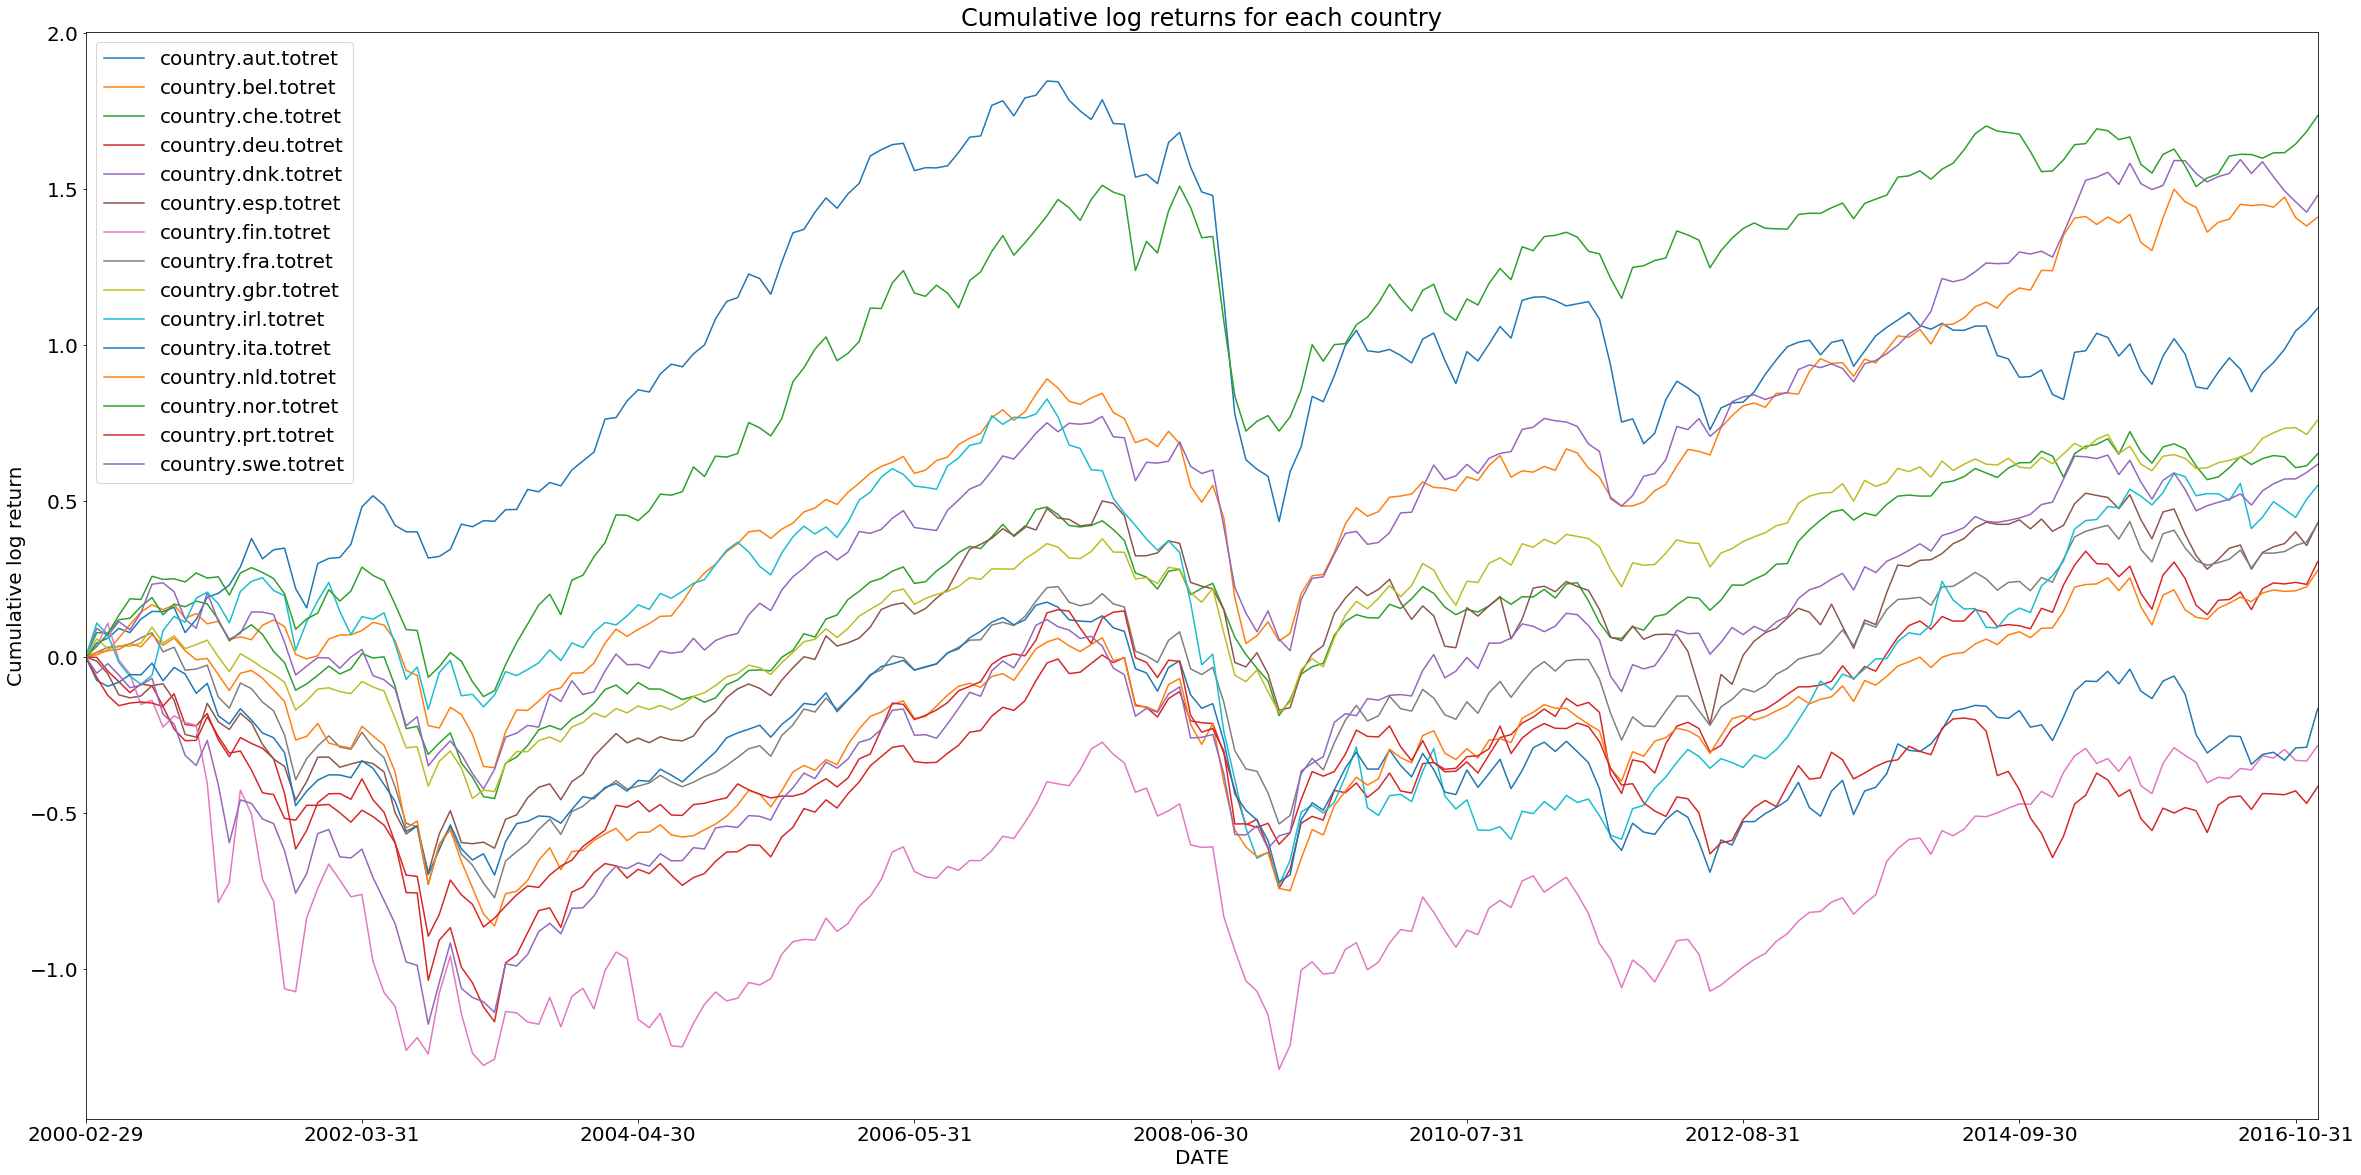

In [5]:
fig = plt.figure(figsize=(40,20))
plt.rcParams.update({'font.size': 20})
for x in return_col_name:
    log_return[x].plot()
    
plt.legend()
plt.title('Cumulative log returns for each country')
plt.ylabel("Cumulative log return")
plt.show()

##  compute the average pairwise correlation of the total return, over the full sample, to verify this

In [6]:
corr_matrix = tot_return.corr()
corr_matrix

,country.aut.totret,country.bel.totret,country.che.totret,country.deu.totret,country.dnk.totret,country.esp.totret,country.fin.totret,country.fra.totret,country.gbr.totret,country.irl.totret,country.ita.totret,country.nld.totret,country.nor.totret,country.prt.totret,country.swe.totret
country.aut.totret,1.000000,0.600894,0.600784,0.608928,0.599358,0.619739,0.408454,0.683450,0.683092,0.587324,0.666103,0.669435,0.726500,0.598596,0.551275
country.bel.totret,0.600894,1.000000,0.706280,0.692139,0.671276,0.594266,0.475715,0.748981,0.713993,0.597643,0.666777,0.745244,0.665655,0.602883,0.627639
country.che.totret,0.600784,0.706280,1.000000,0.776515,0.680219,0.653990,0.569128,0.815916,0.783572,0.634022,0.712993,0.799750,0.649196,0.570585,0.710665
country.deu.totret,0.608928,0.692139,0.776515,1.000000,0.697864,0.737595,0.656915,0.917952,0.817334,0.645742,0.810598,0.848578,0.674337,0.638639,0.823080
country.dnk.totret,0.599358,0.671276,0.680219,0.697864,1.000000,0.577520,0.547041,0.716331,0.682912,0.627443,0.654780,0.745972,0.668954,0.589912,0.711248
country.esp.totret,0.619739,0.594266,0.653990,0.737595,0.577520,1.000000,0.541505,0.809035,0.738849,0.543994,0.827242,0.727241,0.602563,0.711213,0.697419
country.fin.totret,0.408454,0.475715,0.569128,0.656915,0.547041,0.541505,1.000000,0.719970,0.635069,0.534781,0.615891,0.614329,0.522780,0.500365,0.669735
country.fra.totret,0.683450,0.748981,0.815916,0.917952,0.716331,0.809035,0.719970,1.000000,0.883411,0.690548,0.882786,0.900714,0.745563,0.723838,0.836340
country.gbr.totret,0.683092,0.713993,0.783572,0.817334,0.682912,0.738849,0.635069,0.883411,1.000000,0.659331,0.790008,0.852163,0.747313,0.653873,0.778721
country.irl.totret,0.587324,0.597643,0.634022,0.645742,0.627443,0.543994,0.534781,0.690548,0.659331,1.000000,0.606654,0.681679,0.535415,0.492387,0.583204


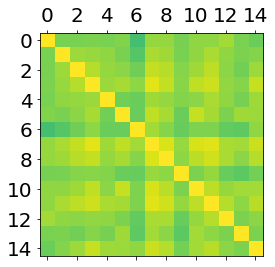

In [7]:
plt.matshow(corr_matrix,vmin=-1,vmax=1)
plt.show()

In [8]:
k = len(corr_matrix.columns)
print("Average pairwise correlation is :",(corr_matrix.sum().sum() - k)/(k*(k-1)))

Average pairwise correlation is : 0.6793779369706293


## Write a function called something like compute.black.litterman, which takes as arguments a dataset $x$ (assumed to be a subset of the full data set corresponding to a continuous date range) $\tau, \kappa$, and a shrinkage parameter used to adjust the correlations. The function should do the following things:
1. Let n = the number of dates in $x$, let k be the number of countries
2. compute a k × k diagonal matrix S = diag($\sigma_1, . . . , \sigma_k$) where $\sigma_j$ is the standard deviation of
returns for country j for dates t = 1 . . . , n − 1.
3. Let $\rho_{samp}$ be the sample correlation matrix of country returns, also for dates t = 1 . . . , n − 1.
Compute
    $$\rho := \text{shrinkage} ∗ \rho_{samp} + (1 − \text{shrinkage}) * I$$
where $I$ is the k × k identity matrix.
4. Compute $\Sigma := S\rho S$
5. Let $C$ be the list of all countries in the sample, and let
$N$ = (nor,swe, dnk, fin)
be the subset of nordic countries. Define a matrix P, which (as usual) has one row per view.
This problem concerns a single view, so P is 1×k. The corresponding portfolio is long one unit
of a basket of investments in the N countries, which is equally-weighted among the N countries
(so each weight is 1/|N|). The portfolio is also short one unit of a basket of investments in
the $C$ \ N countries. The weights in the short basket are given by the (previous month-end)
market caps of the countries in the basket. The long basket and the short basket each sum to
1, separately, and hence the single row of P sums to zero (ie. it is a dollar-neutral portfolio).
6. Take $q = 0.01$ and $\omega^{1/2} = 0.015$.
7. Finally, compute $h_{eq}$ using the market caps, normalized to sum to unity and compute $h^*$ using
Black–Litterman optimization as in the notes. Return a data structure containing $h_{eq}$, $h^*$ and
the dot product of each of $h_{eq}$, $h^*$ with the returns in the last row of $x$. Thus your return data
structure contains two portfolios, two numbers, and also for convenience return the last date
in $x$.

## Now, let T be the total number of dates in the file. For t = T /4 to T, run the function compute.black.litterman on the subset $x$ = all.data[1 : t, ] with parameters $\tau = 0.01$, $\kappa = 1.0$, $\text{shrinkage} = 0.5$. Collect the results over all t, and plot the cumulative log-returns of $h_{eq}$, $h^*$


In [9]:
def Black_Litterman(x, tau, kappa, shrink):
    col_name = x.columns
    return_col_name = [i for i in col_name if i.endswith('totret')]
    usdcap_col_name = [i for i in col_name if i.endswith('usdcap')]
    log_return = np.log(1+x[return_col_name])
    last_date = log_return.index[-1]
    last_return = log_return.iloc[-1,:]
    log_return = log_return.iloc[:-1,:]
    log_return.iloc[0,:] = 0
    market_cap = x[usdcap_col_name]
    k = len(log_return.columns)
    n = len(log_return.index)
    S = np.diag(log_return.std())
    rho = log_return.corr()*shrink + (1-shrink)*np.identity(k)
    Sigma = np.dot(np.dot(S,rho),S)
    C = ['nor','swe', 'dnk', 'fin']
    N = len(C)
    P = np.zeros((1,k))
    total_mak_cap = sum(market_cap.iloc[-2][[col for col in market_cap if col.split('.')[1] not in C]])
    for i in range(k):
        if log_return.columns[i].split('.')[1] in C:
            P[0,i] = 1 / N
        else:
            P[0,i] = - market_cap.iloc[-2,i]/total_mak_cap
    heq = market_cap.divide(market_cap.sum(axis=1),axis = 0).iloc[-2,:].values.reshape(-1,1)
    Big_C = tau * Sigma
    Big_C_inverse = np.linalg.inv(Big_C)
    Pi = kappa * (1 + tau) * np.dot(Sigma, heq)
    Omega = 0.015**2
    Omega_inv = np.array(1/Omega).reshape(1,-1)
    q = 0.01
    H_inverse = np.linalg.inv(np.dot(np.dot(P.T,Omega_inv),P)+Big_C_inverse)
    h_star = 1 / kappa * np.dot(np.dot(np.linalg.inv(H_inverse + Sigma),H_inverse),np.dot(np.dot(P.T,Omega_inv),q) + np.dot(Big_C_inverse, Pi))
    result = []
    result.append(heq)
    result.append(h_star)
    result.append(np.dot(last_return,heq))
    result.append(np.dot(last_return,h_star))
    result.append(last_date)
    
    return result

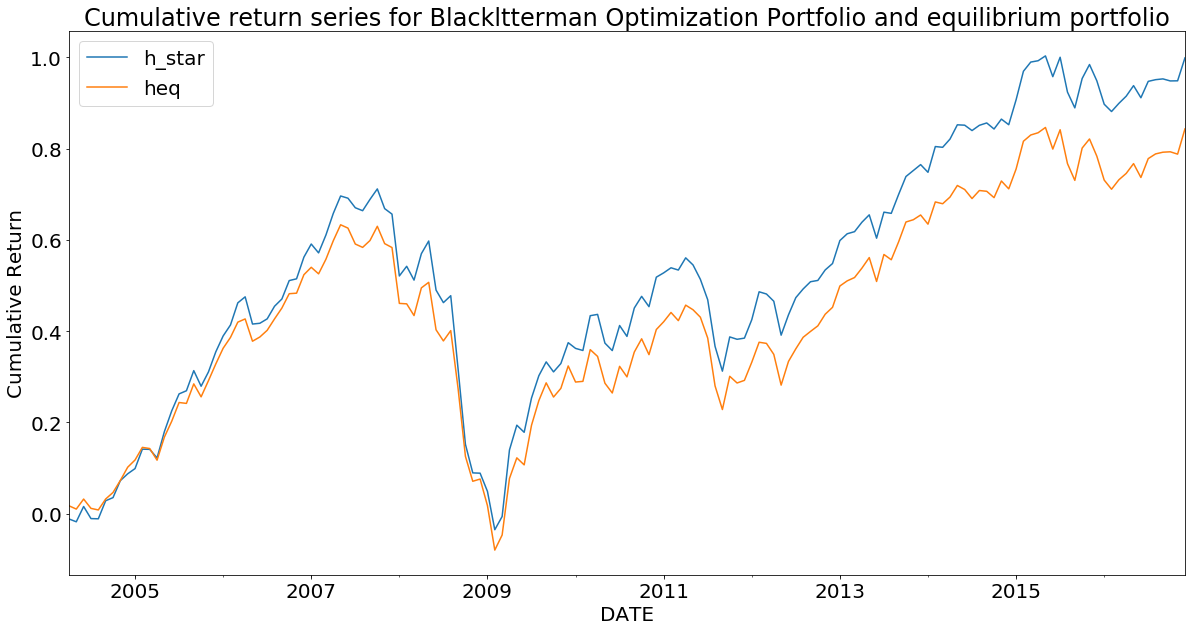

In [10]:
T = len(all_data.index)
return_heq = []
return_h_star = []
date = []
i = 0
for t in range(int(T/4),T):
    x = all_data.iloc[:(t+1),:]
    result = Black_Litterman(x,tau=0.01, kappa=1, shrink=0.5)
    return_heq.append(result[2])
    return_h_star.append(result[3])
    date.append(result[4])
    i += 1

    
return_heq = np.array(return_heq).cumsum()
return_h_star = np.array(return_h_star).cumsum()
date = np.array(date)
res_plot = pd.DataFrame({'heq':return_heq,'h_star':return_h_star,'DATE':date})
res_plot['DATE'] = pd.to_datetime(res_plot['DATE'] )
res_plot.set_index('DATE',inplace=True)
plt.rcParams.update({'font.size': 20})
res_plot.plot(figsize=(20,10))
plt.ylabel('Cumulative Return')
plt.title('Cumulative return series for Blackltterman Optimization Portfolio and equilibrium portfolio')
plt.legend(loc='upper left')
plt.show()